In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


Extracting PATH_TO_STORE_TRAINSET\MNIST\raw\train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET\MNIST\raw



Extracting PATH_TO_STORE_TRAINSET\MNIST\raw\train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET\MNIST\raw



Extracting PATH_TO_STORE_TRAINSET\MNIST\raw\t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET\MNIST\raw



Extracting PATH_TO_STORE_TRAINSET\MNIST\raw\t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET\MNIST\raw
Processing...
Done!



Extracting PATH_TO_STORE_TESTSET\MNIST\raw\train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET\MNIST\raw



Extracting PATH_TO_STORE_TESTSET\MNIST\raw\train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET\MNIST\raw



Extracting PATH_TO_STORE_TESTSET\MNIST\raw\t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET\MNIST\raw



Extracting PATH_TO_STORE_TESTSET\MNIST\raw\t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET\MNIST\raw
Processing...
Done!


In [11]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [12]:
print(images)
print(labels)

tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., 

In [13]:
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


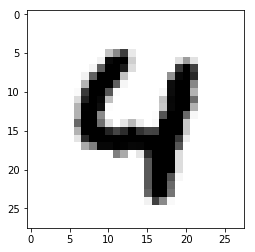

In [14]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

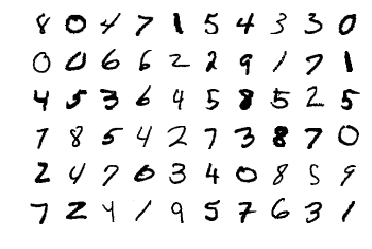

In [15]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

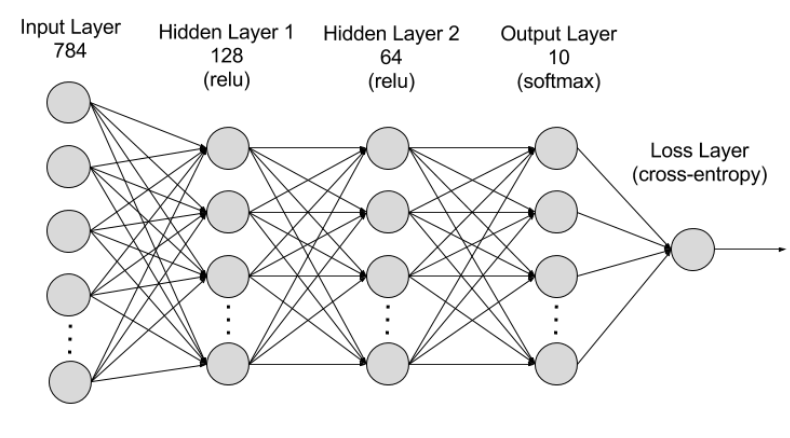

# Building the above neural network

In [25]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [26]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [18]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 2.1204e-03,  2.1204e-03,  2.1204e-03,  ...,  2.1204e-03,
          2.1204e-03,  2.1204e-03],
        [ 1.7877e-03,  1.7877e-03,  1.7877e-03,  ...,  1.7877e-03,
          1.7877e-03,  1.7877e-03],
        [-7.1434e-05, -7.1434e-05, -7.1434e-05,  ..., -7.1435e-05,
         -7.1435e-05, -7.1435e-05],
        ...,
        [-2.2049e-03, -2.2049e-03, -2.2049e-03,  ..., -2.2049e-03,
         -2.2049e-03, -2.2049e-03],
        [-5.7644e-04, -5.7644e-04, -5.7644e-04,  ..., -5.7644e-04,
         -5.7644e-04, -5.7644e-04],
        [-4.1448e-04, -4.1448e-04, -4.1448e-04,  ..., -4.1448e-04,
         -4.1448e-04, -4.1448e-04]])


# Training

In [27]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.659180239780244
Epoch 1 - Training loss: 0.2785033405955031
Epoch 2 - Training loss: 0.21683152662967442
Epoch 3 - Training loss: 0.1738068517893235
Epoch 4 - Training loss: 0.1461063544474431
Epoch 5 - Training loss: 0.12492457164455452
Epoch 6 - Training loss: 0.10997054357923615
Epoch 7 - Training loss: 0.0974667381280775
Epoch 8 - Training loss: 0.08836392347893512
Epoch 9 - Training loss: 0.07887307261831678
Epoch 10 - Training loss: 0.07266103665082296
Epoch 11 - Training loss: 0.06720647675150049
Epoch 12 - Training loss: 0.06093486119483683
Epoch 13 - Training loss: 0.05613592453797393
Epoch 14 - Training loss: 0.052355652410429776

Training Time (in minutes) = 4.666845818360646


In [28]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 4


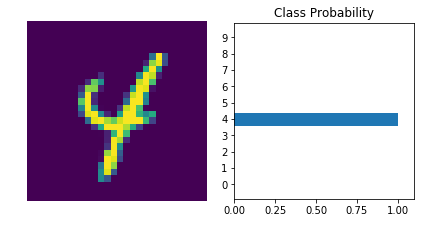

In [32]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

## Checking the accuracy of the model on the validation set

In [33]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9726
